# Введение. Полносвязные слои. Функции активации (ноутбук)

> Начнем осваивать библиотеку `PyTorch`. Познакомимся с нейронными сетями.

## План ноутбука

1. Введение в `PyTorch`
2. Полносвязные слои и функции активации в `PyTorch`
3. Градиентный спуск своими руками

## Введение в `PyTorch`

https://pytorch.org/get-started/locally/

In [ ]:
! pip3 install torch torchvision torchaudio

In [ ]:
! conda install pytorch torchvision torchaudio cudatoolkit=11.3 -c pytorch

### Тензоры

In [1]:
import torch
import numpy as np

In [2]:
print(np.array([[1,2,3,4]]))
print(torch.tensor([[1,2,3,4]]))

[[1 2 3 4]]
tensor([[1, 2, 3, 4]])


In [3]:
print(np.array([[1, 2, 3, 4]]).astype(float))
print(torch.tensor([[1, 2, 3, 4]]).to(float))

[[1. 2. 3. 4.]]
tensor([[1., 2., 3., 4.]], dtype=torch.float64)


In [4]:
print(torch.tensor([[1, 2, 3, 4]]).to(torch.float32))

tensor([[1., 2., 3., 4.]])


In [5]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

print(device)
# print(torch.cuda.get_device_name())

cpu


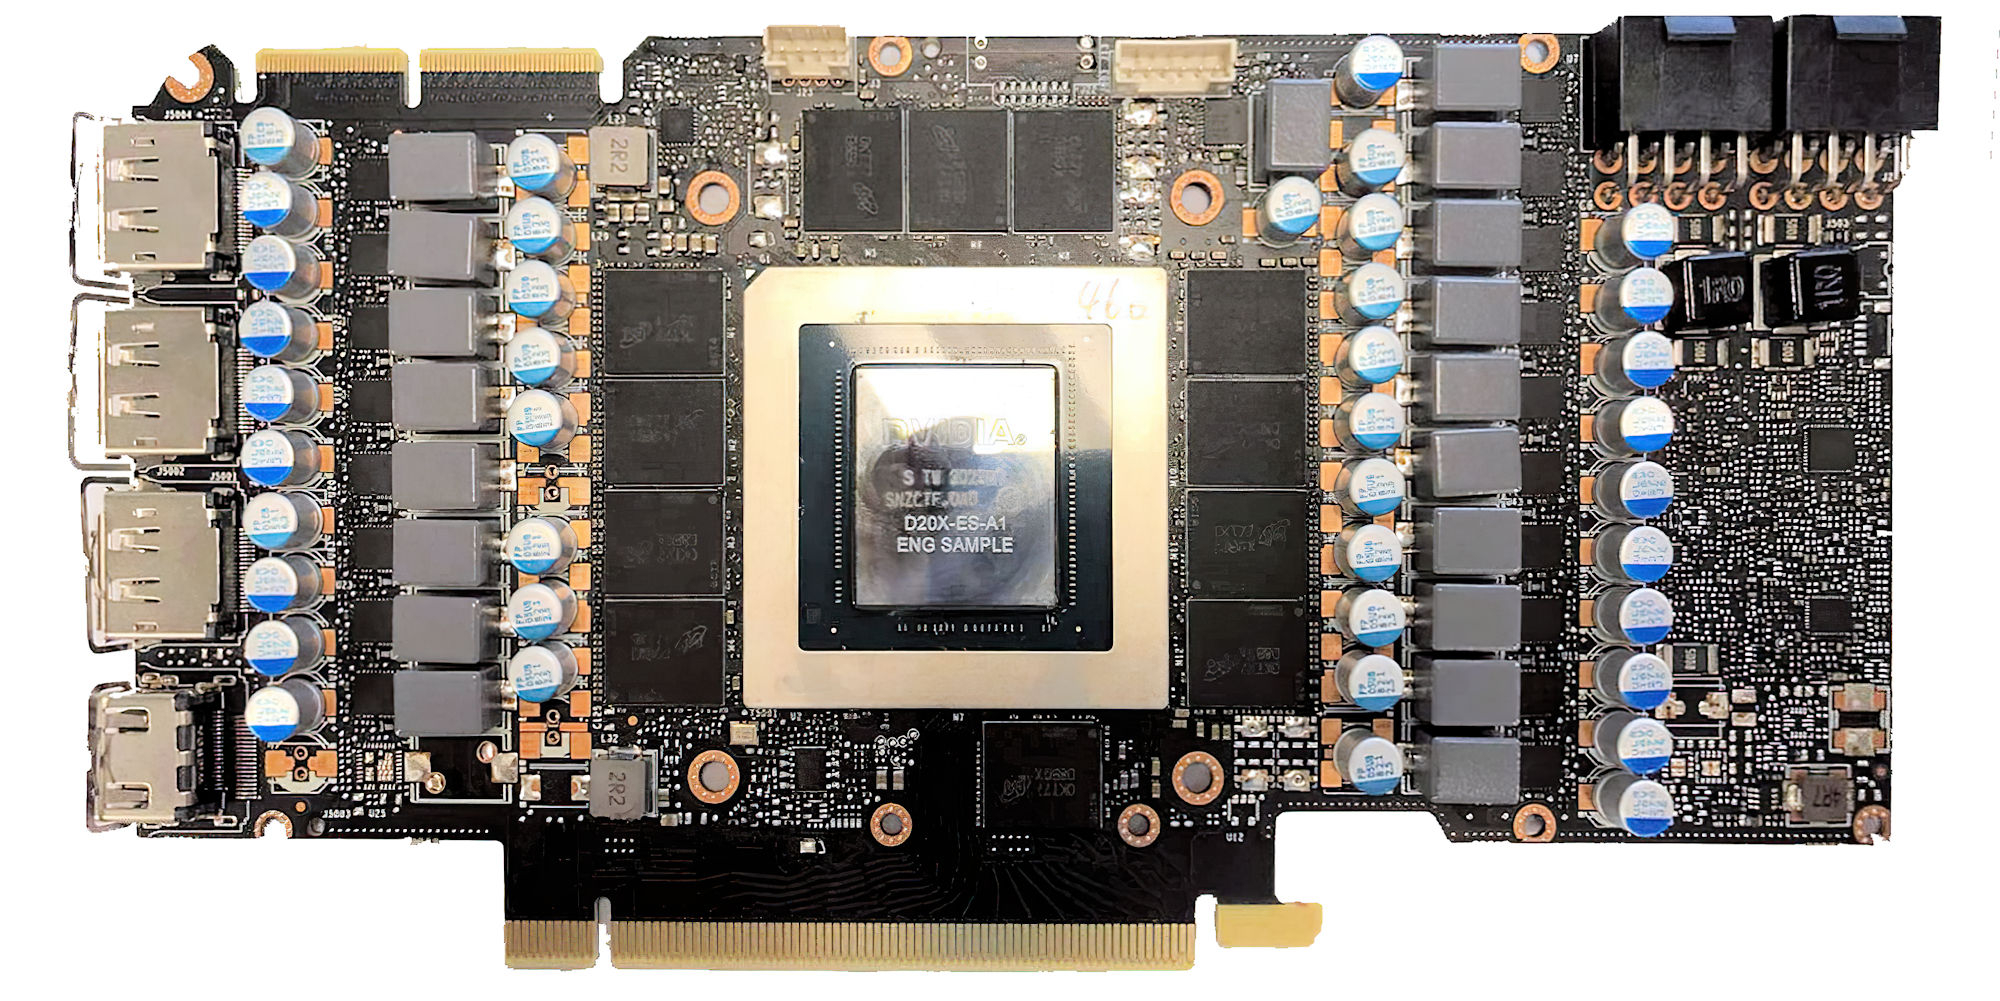

In [6]:
from IPython.display import Image

Image('https://3dnews.ru/assets/external/illustrations/2020/09/15/1020680/_NVIDIA-GeForce-RTX-3090-PCB-1.jpg')

In [7]:
print(torch.tensor([[1, 2, 3, 4]]).to(device))

tensor([[1, 2, 3, 4]])


In [8]:
print(torch.tensor([[1, 2, 3, 4]], dtype=torch.float32, device=device))

tensor([[1., 2., 3., 4.]])


In [9]:
print(torch.zeros(10, 10, dtype=torch.uint8))

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=torch.uint8)


In [10]:
torch.float16, torch.float32, torch.float64, torch.int32, torch.int64

(torch.float16, torch.float32, torch.float64, torch.int32, torch.int64)

In [11]:
a = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8]], dtype=torch.float32)
b = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8]], dtype=torch.float64, device=device)

print(a.shape, b.shape)

torch.Size([2, 4]) torch.Size([2, 4])


In [12]:
print(a + b)

tensor([[ 2.,  4.,  6.,  8.],
        [10., 12., 14., 16.]], dtype=torch.float64)


In [13]:
a.to(device)

print(a + b)

tensor([[ 2.,  4.,  6.,  8.],
        [10., 12., 14., 16.]], dtype=torch.float64)


In [14]:
a.to(torch.int32)

print(a + b)

tensor([[ 2.,  4.,  6.,  8.],
        [10., 12., 14., 16.]], dtype=torch.float64)


In [15]:
a = np.random.rand(5, 3)

print(a.sum(axis=1))

[1.47301777 1.85122777 1.75540292 1.16152825 1.70089769]


In [16]:
b = torch.rand(5, 3)

print(b.sum(dim=1))

tensor([1.6725, 1.3571, 0.9265, 1.4347, 1.0256])


In [17]:
print(b)

print(b[1][2])

b[1][2] = 10

print(b)

tensor([[0.7995, 0.8226, 0.0503],
        [0.3053, 0.6466, 0.4052],
        [0.6480, 0.0485, 0.2299],
        [0.0647, 0.3766, 0.9934],
        [0.1204, 0.2767, 0.6285]])
tensor(0.4052)
tensor([[ 0.7995,  0.8226,  0.0503],
        [ 0.3053,  0.6466, 10.0000],
        [ 0.6480,  0.0485,  0.2299],
        [ 0.0647,  0.3766,  0.9934],
        [ 0.1204,  0.2767,  0.6285]])


In [18]:
c = torch.tensor(130)

c.item()

130

### Автоматическое дифференцирование

In [19]:
a = torch.randn(5, 3)
b = torch.randn(5, 3)

print(a.grad, b.grad)

None None


In [20]:
a.requires_grad = True

print(a.grad)

None


In [21]:
loss = torch.mean((a - b))

print(loss)

tensor(-0.4482, grad_fn=<MeanBackward0>)


In [22]:
print(a.grad)

None


In [23]:
loss.backward()

In [24]:
print(a.grad)

tensor([[0.0667, 0.0667, 0.0667],
        [0.0667, 0.0667, 0.0667],
        [0.0667, 0.0667, 0.0667],
        [0.0667, 0.0667, 0.0667],
        [0.0667, 0.0667, 0.0667]])


In [25]:
1/15

0.06666666666666667

In [26]:
a = torch.randn(5, 3, requires_grad=True)
b = torch.randn(5, 3)

print(a.grad, b.grad)

None None


In [27]:
loss = (a - b) ** 2

print(loss)

tensor([[1.4357e+00, 5.3257e+00, 2.1649e-02],
        [1.7843e+00, 2.0250e+00, 2.9161e-02],
        [2.8732e-01, 6.1747e-03, 2.9016e-03],
        [1.6072e+00, 1.9703e-01, 2.3213e+00],
        [1.2018e+00, 1.0366e-02, 2.6564e+00]], grad_fn=<PowBackward0>)


In [28]:
loss.backward()

RuntimeError: grad can be implicitly created only for scalar outputs

In [29]:
a = torch.rand(3, 5, requires_grad=True)
b = torch.rand(3, 5)

res1 = torch.sum(a ** 2 + b) # 2a
res2 = torch.sum(a + b) # 1

res1.backward()
print(a)
print(a.grad)

res2.backward()
print(a.grad)

tensor([[0.0105, 0.4417, 0.0981, 0.0179, 0.8420],
        [0.3679, 0.9016, 0.3942, 0.1103, 0.9825],
        [0.3878, 0.4416, 0.2168, 0.9923, 0.3888]], requires_grad=True)
tensor([[0.0209, 0.8833, 0.1961, 0.0358, 1.6840],
        [0.7358, 1.8031, 0.7885, 0.2206, 1.9650],
        [0.7757, 0.8832, 0.4335, 1.9846, 0.7775]])
tensor([[1.0209, 1.8833, 1.1961, 1.0358, 2.6840],
        [1.7358, 2.8031, 1.7885, 1.2206, 2.9650],
        [1.7757, 1.8832, 1.4335, 2.9846, 1.7775]])


In [30]:
a = torch.rand(3, 5, requires_grad=True)
b = torch.rand(3, 5)

res1 = torch.sum(a ** 2 + b) # 2a
res2 = torch.sum(a + b) # 1

res = res1 + res2

res.backward() # 2a + 1
print(a)
print(a.grad)

tensor([[0.0635, 0.9155, 0.3440, 0.5890, 0.8947],
        [0.7590, 0.3884, 0.8798, 0.6136, 0.3597],
        [0.6317, 0.1742, 0.5484, 0.3127, 0.9773]], requires_grad=True)
tensor([[1.1270, 2.8310, 1.6880, 2.1781, 2.7894],
        [2.5181, 1.7769, 2.7595, 2.2271, 1.7194],
        [2.2634, 1.3485, 2.0968, 1.6254, 2.9545]])


## Полносвязные слои и функции активации в `PyTorch`

In [31]:
from torch import nn

### Полносвязный слой

>$y = xW^T + b$

In [32]:
layer = nn.Linear(10, 100)

In [33]:
layer

Linear(in_features=10, out_features=100, bias=True)

In [34]:
x = torch.randn(10)

print(layer(x).shape)

torch.Size([100])


In [35]:
print(layer.weight.shape, layer.bias.shape)

torch.Size([100, 10]) torch.Size([100])


### Функции активации

> Сигмоида $f(x) = \dfrac{1}{1 + e^{-x}}$

In [36]:
activation = nn.Sigmoid()

In [37]:
x = torch.randn(10)

print(x)

print(activation(x))

tensor([-1.7005,  1.0479, -0.8771,  0.8589,  0.4306,  0.2221,  0.2780, -0.1133,
         1.9317,  0.4195])
tensor([0.1544, 0.7404, 0.2938, 0.7024, 0.6060, 0.5553, 0.5691, 0.4717, 0.8734,
        0.6034])


> ReLU $f(x) = \max(0, x)$

In [38]:
activation = nn.ReLU()

In [39]:
x = torch.randn(10)

print(x)

print(activation(x))

tensor([ 0.3793,  1.0370, -1.6407,  0.8960, -0.0455,  1.4368, -1.8529, -0.7344,
         0.1126, -0.9689])
tensor([0.3793, 1.0370, 0.0000, 0.8960, 0.0000, 1.4368, 0.0000, 0.0000, 0.1126,
        0.0000])


> Leaky ReLU $f(x) = \max(0, x) + \alpha \min(0, x)$

In [40]:
activation = nn.LeakyReLU(negative_slope=0.001)

In [41]:
x = torch.randn(10)

print(x)

print(activation(x))

tensor([ 0.4334,  0.4990,  0.1235, -0.9106, -0.4570,  0.6993,  1.0107,  1.2545,
         0.6822,  0.2325])
tensor([ 4.3344e-01,  4.9896e-01,  1.2350e-01, -9.1058e-04, -4.5697e-04,
         6.9929e-01,  1.0107e+00,  1.2545e+00,  6.8222e-01,  2.3246e-01])


## Градиентный спуск своими руками

In [42]:
import torch
import numpy as np

In [43]:
n_features = 2
n_objects = 300

torch.manual_seed(0);

In [44]:
w_true = torch.randn(n_features)

X = (torch.rand(n_objects, n_features) - 0.5) * 10
X *= (torch.arange(n_features) * 2 + 1)
Y = X @ w_true + torch.randn(n_objects)

In [45]:
n_steps = 50
step_size = 1e-2

In [46]:
w_list = torch.empty(n_steps, n_features)
w = torch.rand(n_features)

for i in range(n_steps):
    w.requires_grad = True

    w_list[i] = w.detach().clone()
    
    Y_pred = X @ w
    
    mse = torch.mean((Y_pred - Y) ** 2)
    
    print(f'MSE на шаге {i+1} {mse.item():.5f}')
    
    mse.backward()
    
    with torch.no_grad():
        w = w - w.grad * step_size

MSE на шаге 1 11.94029
MSE на шаге 2 6.44385
MSE на шаге 3 4.08700
MSE на шаге 4 2.90786
MSE на шаге 5 2.23443
MSE на шаге 6 1.81437
MSE на шаге 7 1.53915
MSE на шаге 8 1.35435
MSE на шаге 9 1.22880
MSE на шаге 10 1.14304
MSE на шаге 11 1.08432
MSE на шаге 12 1.04407
MSE на шаге 13 1.01646
MSE на шаге 14 0.99752
MSE на шаге 15 0.98453
MSE на шаге 16 0.97562
MSE на шаге 17 0.96950
MSE на шаге 18 0.96530
MSE на шаге 19 0.96242
MSE на шаге 20 0.96045
MSE на шаге 21 0.95909
MSE на шаге 22 0.95816
MSE на шаге 23 0.95753
MSE на шаге 24 0.95709
MSE на шаге 25 0.95679
MSE на шаге 26 0.95658
MSE на шаге 27 0.95644
MSE на шаге 28 0.95634
MSE на шаге 29 0.95628
MSE на шаге 30 0.95623
MSE на шаге 31 0.95620
MSE на шаге 32 0.95618
MSE на шаге 33 0.95616
MSE на шаге 34 0.95615
MSE на шаге 35 0.95615
MSE на шаге 36 0.95614
MSE на шаге 37 0.95614
MSE на шаге 38 0.95614
MSE на шаге 39 0.95613
MSE на шаге 40 0.95613
MSE на шаге 41 0.95613
MSE на шаге 42 0.95613
MSE на шаге 43 0.95613
MSE на шаге 44 0.95

In [47]:
from plot_trajectory import plot_trajectory

In [48]:
plot_trajectory(
    w_list.numpy(),
    w_true.numpy(),
    X.numpy(),
    Y.numpy(),
    'Полный градиентный спуск'
)

In [49]:
w_true, w_list[-1]

(tensor([ 1.5410, -0.2934]), tensor([ 1.5389, -0.2881]))